# 영상입력 수치 예측 모델 레시피
영상을 입력해서 수치를 예측하는 모델들에 대하여 알아보겠다.<br>
수치 예측을 위한 영상 데이터셋을 생성해보고, 다층퍼셉트론 및 컨볼루션 신경망 모델을 구성 및 학습시켜보겠다.<br>
이 모델은 고정된 지역에서 촬영된 영상으로부터 복잡도, 밀도 등을 수치화하는 문제를 풀 수 있다.<br>
- CCTV 등 촬영 영상으로부터 미세먼지 지수 예측
- 위성영상으로부터 녹조, 적조 등의 지수 예측
- 태양광 패널의 먼지가 쌓여있는 정도 예측
<br>

### 1. 데이터셋 준비
너비가 16, 높이가 16이고, 픽셀값으로 0과 1을 가지는 영상을 만들어보겠다.<br>
임의의 값이 주어지면, 그 값만큼 반복하여 영상 내에 픽셀값이 1인 픽셀을 찍었다.<br>
여기서 임의의 값을 라벨값으로 지정하였다.

In [1]:
import numpy as np

width = 16
height =16

def generate_dataset(samples):
    
    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
        
    return np.array(ds_x), np.array(ds_y).reshape(samples,1)

def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
        
    return img.reshape(width,height,1)

In [3]:
#데이터셋 생성( 훈련셋 : 1500개, 검증셋 : 300개, 시험셋 : 100개)

x_train, y_train = generate_dataset(1500)
x_val, y_val = generate_dataset(300)
x_test, y_test = generate_dataset(100)

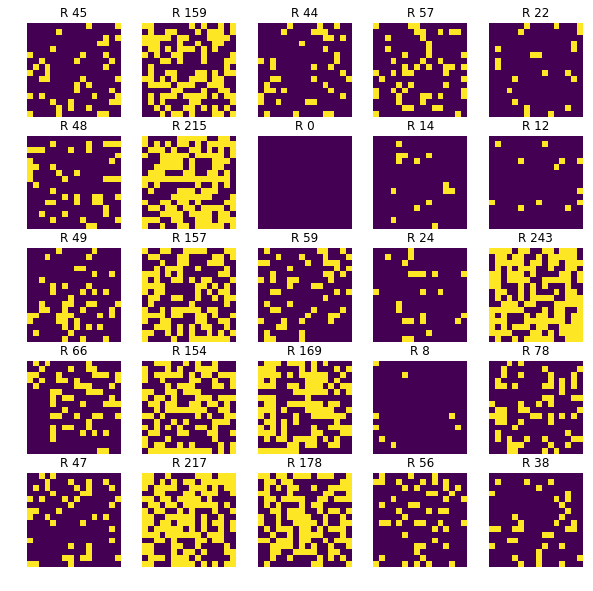

In [5]:
#데이터셋 일부 가시화

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i].reshape(width,height))
    sub_plt.set_title('R ' + str(y_train[i][0]))
    
plt.show()

R(Real)은 픽셀값이 1인 픽셀 수를 의미한다. 한 번 표시한 픽셀에 다시 표시가 될 수 있기 때문에 실제 픽셀 수와 조금 차이가 있을 수 있다.

### 2. 레이어 준비
- 2D Input data

2차원의 입력 데이터이다.<br>
주로 영상 데이터를 의미하며 너비 높이 채널 수로 구성되어있다.<br>

- Conv2D

필터를 이용하여 영상 특징을 추출하는 컨볼루션 레이어이다.<br>

- MaxPooling2D

영상에서 사소한 변화가 특징 추출에 크게 영향을 미치지 않도록 해주는 맥스풀링 레이어이다.<br>

- Flatten

2차원의 특징 맵을 전결합층으로 전달하기 위해 1차원 형식으로 바꿔준다.<br>

- relu

활성화 함수로 주로 Conv2D 은닉층에 사용된다.<br>

### 3. 모델 준비
영상입력 수치 예측을 하기 위해 다층퍼셉트론 신경망 모델, 컨볼루션 신경망 모델을 준비하였다.
<br>
- 다층퍼셉트론 신경망 모델

      model = Sequential()
      model.add(Dense(256, input_dim = width * height, activation = 'relu'))
      model.add(Dense(256, activation = 'relu'))
      model.add(Dense(256))
      model.add(Dense(1))
<br>

- 컨볼루션 신경망 모델

      model = Sequential()
      model.add(Conv2D(32, (3,3),input_dim = (width, height, 1), activation = 'relu'))
      model.add(MaxPooling2D(pool_size(2,2)))
      model.add(Conv2D(32, (3,3), activation = 'relu'))
      model.add(MaxPooling2D(pool_size(2,2)))
      model.add(Flatten())
      model.add(Dense(256), activation = 'relu'))
      model.add(Dense(1))    
    
### 4. 전체 소스

Using TensorFlow backend.









Train on 1500 samples, validate on 300 samples
Epoch 1/1000





1500/1500 [==============================] - 3s 2ms/step - loss: 4531.4984 - val_loss: 502.6979
Epoch 2/1000
1500/1500 [==============================] - 0s 67us/step - loss: 301.5262 - val_loss: 245.2407
Epoch 3/1000
1500/1500 [==============================] - 0s 73us/step - loss: 208.6551 - val_loss: 190.3442
Epoch 4/1000
1500/1500 [==============================] - 0s 74us/step - loss: 150.2709 - val_loss: 158.5467
Epoch 5/1000
1500/1500 [==============================] - 0s 73us/step - loss: 101.3946 - val_loss: 133.8490
Epoch 6/1000
1500/1500 [==============================] - 0s 68us/step - loss: 72.9046 - val_loss: 149.1762
Epoch 7/1000
1500/1500 [==============================] - 0s 66us/step - loss: 56.4535 - val_loss: 118.9446
Epoch 8/1000
1500/1500 [==============================] - 0s 67us/step - loss: 41.1626 - val_loss: 118.0269
Epoch 9/1000
1500/1500 [==============================] - 0s 70us/step -

1500/1500 [==============================] - 0s 75us/step - loss: 0.2638 - val_loss: 101.7600
Epoch 128/1000
1500/1500 [==============================] - 0s 74us/step - loss: 0.2871 - val_loss: 100.9388
Epoch 129/1000
1500/1500 [==============================] - 0s 70us/step - loss: 0.1309 - val_loss: 100.0497
Epoch 130/1000
1500/1500 [==============================] - 0s 72us/step - loss: 0.1367 - val_loss: 100.3058
Epoch 131/1000
1500/1500 [==============================] - 0s 70us/step - loss: 0.0887 - val_loss: 100.7167
Epoch 132/1000
1500/1500 [==============================] - 0s 73us/step - loss: 0.1164 - val_loss: 100.3490
Epoch 133/1000
1500/1500 [==============================] - 0s 71us/step - loss: 0.2226 - val_loss: 99.0192
Epoch 134/1000
1500/1500 [==============================] - 0s 72us/step - loss: 1.7485 - val_loss: 106.3578
Epoch 135/1000
1500/1500 [==============================] - 0s 73us/step - loss: 5.7015 - val_loss: 110.8631
Epoch 136/1000
1500/1500 [=========

1500/1500 [==============================] - 0s 81us/step - loss: 0.6845 - val_loss: 101.2171
Epoch 278/1000
1500/1500 [==============================] - 0s 77us/step - loss: 1.6384 - val_loss: 115.3764
Epoch 279/1000
1500/1500 [==============================] - 0s 79us/step - loss: 8.8377 - val_loss: 100.9573
Epoch 280/1000
1500/1500 [==============================] - 0s 76us/step - loss: 9.3085 - val_loss: 107.6798
Epoch 281/1000
1500/1500 [==============================] - 0s 76us/step - loss: 7.9658 - val_loss: 100.6279
Epoch 282/1000
1500/1500 [==============================] - 0s 76us/step - loss: 2.9825 - val_loss: 101.5484
Epoch 283/1000
1500/1500 [==============================] - 0s 79us/step - loss: 1.6153 - val_loss: 98.6031
Epoch 284/1000
1500/1500 [==============================] - 0s 75us/step - loss: 0.7857 - val_loss: 98.9509
Epoch 285/1000
1500/1500 [==============================] - 0s 76us/step - loss: 0.7446 - val_loss: 100.4783
Epoch 286/1000
1500/1500 [==========

1500/1500 [==============================] - 0s 83us/step - loss: 0.9871 - val_loss: 103.2631
Epoch 428/1000
1500/1500 [==============================] - 0s 79us/step - loss: 0.4647 - val_loss: 100.0171
Epoch 429/1000
1500/1500 [==============================] - 0s 80us/step - loss: 2.0699 - val_loss: 101.9253
Epoch 430/1000
1500/1500 [==============================] - 0s 76us/step - loss: 11.0275 - val_loss: 107.2971
Epoch 431/1000
1500/1500 [==============================] - 0s 77us/step - loss: 6.4902 - val_loss: 101.3774
Epoch 432/1000
1500/1500 [==============================] - 0s 79us/step - loss: 2.7471 - val_loss: 98.9821
Epoch 433/1000
1500/1500 [==============================] - 0s 79us/step - loss: 1.0373 - val_loss: 99.5419
Epoch 434/1000
1500/1500 [==============================] - 0s 78us/step - loss: 1.2767 - val_loss: 100.1921
Epoch 435/1000
1500/1500 [==============================] - 0s 80us/step - loss: 0.9121 - val_loss: 100.7959
Epoch 436/1000
1500/1500 [=========

1500/1500 [==============================] - 0s 91us/step - loss: 5.7027 - val_loss: 121.2083
Epoch 578/1000
1500/1500 [==============================] - 0s 89us/step - loss: 4.6930 - val_loss: 103.9313
Epoch 579/1000
1500/1500 [==============================] - 0s 88us/step - loss: 1.8946 - val_loss: 109.2161
Epoch 580/1000
1500/1500 [==============================] - 0s 88us/step - loss: 1.4299 - val_loss: 99.1113
Epoch 581/1000
1500/1500 [==============================] - 0s 87us/step - loss: 1.8147 - val_loss: 98.5960
Epoch 582/1000
1500/1500 [==============================] - 0s 89us/step - loss: 1.3696 - val_loss: 103.0613
Epoch 583/1000
1500/1500 [==============================] - 0s 89us/step - loss: 1.7857 - val_loss: 99.6340
Epoch 584/1000
1500/1500 [==============================] - 0s 90us/step - loss: 0.9756 - val_loss: 103.1294
Epoch 585/1000
1500/1500 [==============================] - 0s 89us/step - loss: 0.4876 - val_loss: 100.4689
Epoch 586/1000
1500/1500 [===========

1500/1500 [==============================] - 0s 82us/step - loss: 0.2953 - val_loss: 100.0013
Epoch 728/1000
1500/1500 [==============================] - 0s 81us/step - loss: 0.4656 - val_loss: 101.8264
Epoch 729/1000
1500/1500 [==============================] - 0s 82us/step - loss: 0.4046 - val_loss: 99.5940
Epoch 730/1000
1500/1500 [==============================] - 0s 82us/step - loss: 0.9816 - val_loss: 100.2123
Epoch 731/1000
1500/1500 [==============================] - 0s 80us/step - loss: 0.8022 - val_loss: 98.5173
Epoch 732/1000
1500/1500 [==============================] - 0s 82us/step - loss: 2.6486 - val_loss: 99.3709
Epoch 733/1000
1500/1500 [==============================] - 0s 82us/step - loss: 2.3209 - val_loss: 108.4650
Epoch 734/1000
1500/1500 [==============================] - 0s 82us/step - loss: 6.9638 - val_loss: 104.4423
Epoch 735/1000
1500/1500 [==============================] - 0s 83us/step - loss: 3.2237 - val_loss: 100.8282
Epoch 736/1000
1500/1500 [===========

1500/1500 [==============================] - 0s 80us/step - loss: 0.0326 - val_loss: 102.2792
Epoch 878/1000
1500/1500 [==============================] - 0s 81us/step - loss: 0.0333 - val_loss: 100.6219
Epoch 879/1000
1500/1500 [==============================] - 0s 83us/step - loss: 0.0513 - val_loss: 102.0211
Epoch 880/1000
1500/1500 [==============================] - 0s 79us/step - loss: 0.0253 - val_loss: 101.8886
Epoch 881/1000
1500/1500 [==============================] - 0s 79us/step - loss: 0.0133 - val_loss: 101.7873
Epoch 882/1000
1500/1500 [==============================] - 0s 82us/step - loss: 0.0156 - val_loss: 101.8185
Epoch 883/1000
1500/1500 [==============================] - 0s 79us/step - loss: 0.0176 - val_loss: 101.8146
Epoch 884/1000
1500/1500 [==============================] - 0s 81us/step - loss: 0.0173 - val_loss: 101.9152
Epoch 885/1000
1500/1500 [==============================] - 0s 82us/step - loss: 0.0282 - val_loss: 101.0126
Epoch 886/1000
1500/1500 [========

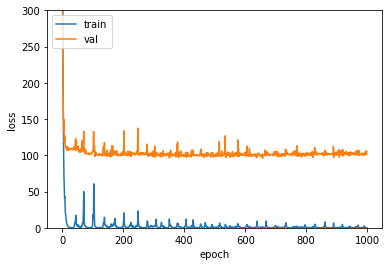

100/100 [==============================] - 0s 53us/step
120.52575592041016


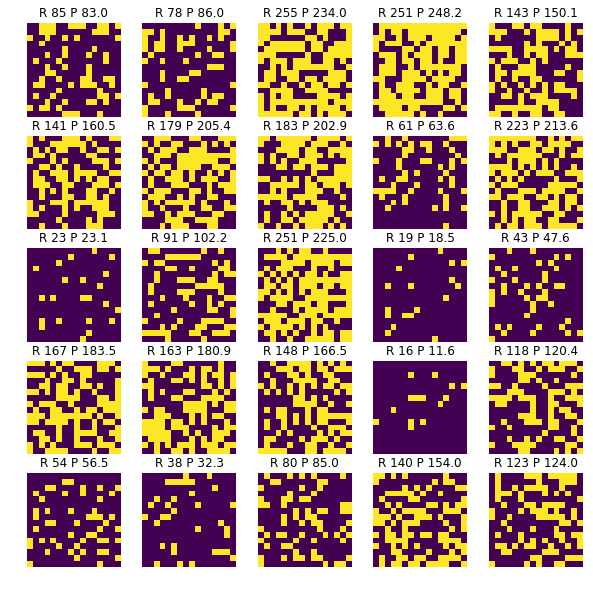

In [6]:
# 다층퍼셉트론 신경망 모델

# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

width = 16
height = 16

def generate_dataset(samples):

    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
    
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)
    
def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    
    return img.reshape(width, height, 1)

# 1. 데이터셋 생성하기
x_train, y_train = generate_dataset(1500)
x_val, y_val = generate_dataset(300)
x_test, y_test = generate_dataset(100)

x_train_1d = x_train.reshape(x_train.shape[0], width*height)
x_val_1d = x_val.reshape(x_val.shape[0], width*height)
x_test_1d = x_test.reshape(x_test.shape[0], width*height)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, activation='relu', input_dim = width*height))
model.add(Dense(256, activation='relu'))
model.add(Dense(256))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mse', optimizer='adam')

# 4. 모델 학습시키기
hist = model.fit(x_train_1d, y_train, batch_size=32, epochs=1000, validation_data=(x_val_1d, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test_1d, y_test, batch_size=32)

print(score)

# 7. 모델 사용하기
yhat_test = model.predict(x_test_1d, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()


다층퍼셉트론 모델의 입력층인 Dense 레이어는 일차원 벡터로 데이터를 입력 받기 때문에, 이차원인 영상을 일차원 벡터로 변환하는 과정이 필요하다.<br>

    x_train_1d = x_train.reshape(x_train.shape[0], width*height)
    x_val_1d = x_val.reshape(x_val.shape[0], width*height)
    x_test_1d = x_test.reshape(x_test.shape[0], width*height)

Using TensorFlow backend.










Train on 1500 samples, validate on 300 samples
Epoch 1/1000





1500/1500 [==============================] - 1s 603us/step - loss: 12046.0122 - val_loss: 2183.6551
Epoch 2/1000
1500/1500 [==============================] - 0s 247us/step - loss: 1555.9196 - val_loss: 1340.3026
Epoch 3/1000
1500/1500 [==============================] - 0s 245us/step - loss: 1108.2014 - val_loss: 1020.7094
Epoch 4/1000
1500/1500 [==============================] - 0s 241us/step - loss: 847.9946 - val_loss: 807.4052
Epoch 5/1000
1500/1500 [==============================] - 0s 264us/step - loss: 660.3542 - val_loss: 625.9101
Epoch 6/1000
1500/1500 [==============================] - 0s 275us/step - loss: 490.5324 - val_loss: 438.0189
Epoch 7/1000
1500/1500 [==============================] - 0s 248us/step - loss: 366.7961 - val_loss: 366.6168
Epoch 8/1000
1500/1500 [==============================] - 0s 216us/step - loss: 290.0616 - val_loss: 283.5194
Epoch 9/1000
1500/1500 [=============================

1500/1500 [==============================] - 0s 213us/step - loss: 105.4532 - val_loss: 163.6127
Epoch 51/1000
1500/1500 [==============================] - 0s 211us/step - loss: 102.2926 - val_loss: 165.3503
Epoch 52/1000
1500/1500 [==============================] - 0s 213us/step - loss: 100.1268 - val_loss: 160.2174
Epoch 53/1000
1500/1500 [==============================] - 0s 225us/step - loss: 100.6804 - val_loss: 187.3510
Epoch 54/1000
1500/1500 [==============================] - 0s 207us/step - loss: 103.8748 - val_loss: 169.0792
Epoch 55/1000
1500/1500 [==============================] - 0s 237us/step - loss: 96.7846 - val_loss: 161.5710
Epoch 56/1000
1500/1500 [==============================] - 0s 236us/step - loss: 94.5676 - val_loss: 165.9777
Epoch 57/1000
1500/1500 [==============================] - 0s 233us/step - loss: 92.6374 - val_loss: 166.4138
Epoch 58/1000
1500/1500 [==============================] - 0s 235us/step - loss: 99.8554 - val_loss: 157.6010
Epoch 59/1000
1500/

1500/1500 [==============================] - 0s 223us/step - loss: 34.5991 - val_loss: 185.5093
Epoch 125/1000
1500/1500 [==============================] - 0s 231us/step - loss: 33.8870 - val_loss: 183.3542
Epoch 126/1000
1500/1500 [==============================] - 0s 211us/step - loss: 30.2469 - val_loss: 181.4804
Epoch 127/1000
1500/1500 [==============================] - 0s 231us/step - loss: 30.2895 - val_loss: 182.8303
Epoch 128/1000
1500/1500 [==============================] - 0s 223us/step - loss: 34.7101 - val_loss: 188.5089
Epoch 129/1000
1500/1500 [==============================] - 0s 212us/step - loss: 33.0684 - val_loss: 194.5759
Epoch 130/1000
1500/1500 [==============================] - 0s 204us/step - loss: 35.3169 - val_loss: 201.1589
Epoch 131/1000
1500/1500 [==============================] - 0s 213us/step - loss: 33.3280 - val_loss: 203.6484
Epoch 132/1000
1500/1500 [==============================] - 0s 193us/step - loss: 32.7534 - val_loss: 184.8166
Epoch 133/1000
1

Epoch 198/1000
1500/1500 [==============================] - 0s 228us/step - loss: 6.6309 - val_loss: 213.2739
Epoch 199/1000
1500/1500 [==============================] - 0s 209us/step - loss: 5.8501 - val_loss: 211.9755
Epoch 200/1000
1500/1500 [==============================] - 0s 276us/step - loss: 5.7687 - val_loss: 219.4083
Epoch 201/1000
1500/1500 [==============================] - 0s 241us/step - loss: 5.3593 - val_loss: 218.7111
Epoch 202/1000
1500/1500 [==============================] - 0s 212us/step - loss: 6.2553 - val_loss: 216.0414
Epoch 203/1000
1500/1500 [==============================] - 0s 225us/step - loss: 4.6467 - val_loss: 228.2292
Epoch 204/1000
1500/1500 [==============================] - 0s 230us/step - loss: 8.8844 - val_loss: 214.7023
Epoch 205/1000
1500/1500 [==============================] - 0s 222us/step - loss: 5.7416 - val_loss: 214.1046
Epoch 206/1000
1500/1500 [==============================] - 0s 216us/step - loss: 5.5333 - val_loss: 214.0397
Epoch 207/

1500/1500 [==============================] - 0s 226us/step - loss: 1.8437 - val_loss: 224.0254
Epoch 273/1000
1500/1500 [==============================] - 0s 206us/step - loss: 0.8029 - val_loss: 229.4965
Epoch 274/1000
1500/1500 [==============================] - 0s 207us/step - loss: 2.1508 - val_loss: 222.2752
Epoch 275/1000
1500/1500 [==============================] - 0s 213us/step - loss: 1.4110 - val_loss: 224.7429
Epoch 276/1000
1500/1500 [==============================] - 0s 215us/step - loss: 0.7071 - val_loss: 227.6359
Epoch 277/1000
1500/1500 [==============================] - 0s 206us/step - loss: 0.6288 - val_loss: 224.2856
Epoch 278/1000
1500/1500 [==============================] - 0s 231us/step - loss: 0.4562 - val_loss: 227.0909
Epoch 279/1000
1500/1500 [==============================] - 0s 226us/step - loss: 0.3987 - val_loss: 225.8408
Epoch 280/1000
1500/1500 [==============================] - 0s 218us/step - loss: 0.4545 - val_loss: 225.5726
Epoch 281/1000
1500/1500 

1500/1500 [==============================] - 0s 241us/step - loss: 1.0817 - val_loss: 224.6467
Epoch 347/1000
1500/1500 [==============================] - 0s 238us/step - loss: 1.2025 - val_loss: 224.7819
Epoch 348/1000
1500/1500 [==============================] - 0s 249us/step - loss: 0.4381 - val_loss: 224.3367
Epoch 349/1000
1500/1500 [==============================] - 0s 233us/step - loss: 0.4150 - val_loss: 226.3992
Epoch 350/1000
1500/1500 [==============================] - 0s 219us/step - loss: 0.7064 - val_loss: 225.7022
Epoch 351/1000
1500/1500 [==============================] - 0s 238us/step - loss: 1.4350 - val_loss: 226.0465
Epoch 352/1000
1500/1500 [==============================] - 0s 223us/step - loss: 4.0883 - val_loss: 225.2663
Epoch 353/1000
1500/1500 [==============================] - 0s 192us/step - loss: 2.9154 - val_loss: 222.9186
Epoch 354/1000
1500/1500 [==============================] - 0s 202us/step - loss: 4.1680 - val_loss: 235.3790
Epoch 355/1000
1500/1500 

1500/1500 [==============================] - 0s 205us/step - loss: 3.4461 - val_loss: 224.9208
Epoch 421/1000
1500/1500 [==============================] - 0s 216us/step - loss: 1.4555 - val_loss: 225.5629
Epoch 422/1000
1500/1500 [==============================] - 0s 193us/step - loss: 0.6894 - val_loss: 220.8617
Epoch 423/1000
1500/1500 [==============================] - 0s 206us/step - loss: 1.6819 - val_loss: 221.0046
Epoch 424/1000
1500/1500 [==============================] - 0s 214us/step - loss: 1.1785 - val_loss: 223.3101
Epoch 425/1000
1500/1500 [==============================] - 0s 210us/step - loss: 0.4195 - val_loss: 223.8612
Epoch 426/1000
1500/1500 [==============================] - 0s 207us/step - loss: 0.3000 - val_loss: 222.7695
Epoch 427/1000
1500/1500 [==============================] - 0s 213us/step - loss: 0.3245 - val_loss: 225.2279
Epoch 428/1000
1500/1500 [==============================] - 0s 205us/step - loss: 0.2451 - val_loss: 221.6194
Epoch 429/1000
1500/1500 

1500/1500 [==============================] - 0s 214us/step - loss: 0.6981 - val_loss: 224.0319
Epoch 495/1000
1500/1500 [==============================] - 0s 199us/step - loss: 0.3329 - val_loss: 224.7997
Epoch 496/1000
1500/1500 [==============================] - 0s 202us/step - loss: 0.3006 - val_loss: 224.0057
Epoch 497/1000
1500/1500 [==============================] - 0s 195us/step - loss: 0.2752 - val_loss: 222.4489
Epoch 498/1000
1500/1500 [==============================] - 0s 217us/step - loss: 0.4362 - val_loss: 222.0332
Epoch 499/1000
1500/1500 [==============================] - 0s 206us/step - loss: 0.2974 - val_loss: 223.5201
Epoch 500/1000
1500/1500 [==============================] - 0s 210us/step - loss: 0.6331 - val_loss: 222.3061
Epoch 501/1000
1500/1500 [==============================] - 0s 188us/step - loss: 0.4214 - val_loss: 220.9669
Epoch 502/1000
1500/1500 [==============================] - 0s 223us/step - loss: 0.3166 - val_loss: 222.5902
Epoch 503/1000
1500/1500 

1500/1500 [==============================] - 0s 199us/step - loss: 0.6905 - val_loss: 224.0219
Epoch 569/1000
1500/1500 [==============================] - 0s 208us/step - loss: 0.3228 - val_loss: 221.1577
Epoch 570/1000
1500/1500 [==============================] - 0s 190us/step - loss: 1.1700 - val_loss: 221.8938
Epoch 571/1000
1500/1500 [==============================] - 0s 206us/step - loss: 1.1355 - val_loss: 222.7656
Epoch 572/1000
1500/1500 [==============================] - 0s 204us/step - loss: 3.4871 - val_loss: 223.3210
Epoch 573/1000
1500/1500 [==============================] - 0s 193us/step - loss: 2.6745 - val_loss: 224.9980
Epoch 574/1000
1500/1500 [==============================] - 0s 195us/step - loss: 1.4018 - val_loss: 220.4469
Epoch 575/1000
1500/1500 [==============================] - 0s 202us/step - loss: 0.7717 - val_loss: 221.0992
Epoch 576/1000
1500/1500 [==============================] - 0s 208us/step - loss: 0.4943 - val_loss: 221.6648
Epoch 577/1000
1500/1500 

1500/1500 [==============================] - 0s 194us/step - loss: 0.3384 - val_loss: 222.0032
Epoch 643/1000
1500/1500 [==============================] - 0s 198us/step - loss: 0.2670 - val_loss: 222.9195
Epoch 644/1000
1500/1500 [==============================] - 0s 196us/step - loss: 0.4740 - val_loss: 221.4679
Epoch 645/1000
1500/1500 [==============================] - 0s 189us/step - loss: 0.6963 - val_loss: 225.3612
Epoch 646/1000
1500/1500 [==============================] - 0s 207us/step - loss: 0.9428 - val_loss: 223.1332
Epoch 647/1000
1500/1500 [==============================] - 0s 222us/step - loss: 1.3707 - val_loss: 220.3269
Epoch 648/1000
1500/1500 [==============================] - 0s 199us/step - loss: 0.7350 - val_loss: 222.4390
Epoch 649/1000
1500/1500 [==============================] - 0s 205us/step - loss: 0.8791 - val_loss: 224.6088
Epoch 650/1000
1500/1500 [==============================] - 0s 200us/step - loss: 1.0443 - val_loss: 219.5328
Epoch 651/1000
1500/1500 

1500/1500 [==============================] - 0s 210us/step - loss: 0.3211 - val_loss: 222.3087
Epoch 717/1000
1500/1500 [==============================] - 0s 203us/step - loss: 0.2382 - val_loss: 224.9552
Epoch 718/1000
1500/1500 [==============================] - 0s 224us/step - loss: 0.4367 - val_loss: 222.0258
Epoch 719/1000
1500/1500 [==============================] - 0s 210us/step - loss: 0.3196 - val_loss: 226.3490
Epoch 720/1000
1500/1500 [==============================] - 0s 211us/step - loss: 1.3610 - val_loss: 220.2554
Epoch 721/1000
1500/1500 [==============================] - 0s 212us/step - loss: 0.9736 - val_loss: 221.9908
Epoch 722/1000
1500/1500 [==============================] - 0s 194us/step - loss: 0.4543 - val_loss: 220.6109
Epoch 723/1000
1500/1500 [==============================] - 0s 198us/step - loss: 0.8180 - val_loss: 229.4900
Epoch 724/1000
1500/1500 [==============================] - 0s 231us/step - loss: 1.0499 - val_loss: 218.1657
Epoch 725/1000
1500/1500 

1500/1500 [==============================] - 0s 212us/step - loss: 0.4300 - val_loss: 220.4106
Epoch 791/1000
1500/1500 [==============================] - 0s 204us/step - loss: 0.8279 - val_loss: 219.4609
Epoch 792/1000
1500/1500 [==============================] - 0s 227us/step - loss: 1.3973 - val_loss: 216.8181
Epoch 793/1000
1500/1500 [==============================] - 0s 209us/step - loss: 4.0270 - val_loss: 218.9674
Epoch 794/1000
1500/1500 [==============================] - 0s 237us/step - loss: 2.2008 - val_loss: 225.3905
Epoch 795/1000
1500/1500 [==============================] - 0s 232us/step - loss: 1.0765 - val_loss: 220.4938
Epoch 796/1000
1500/1500 [==============================] - 0s 219us/step - loss: 0.6525 - val_loss: 220.5442
Epoch 797/1000
1500/1500 [==============================] - 0s 208us/step - loss: 0.5086 - val_loss: 221.5984
Epoch 798/1000
1500/1500 [==============================] - 0s 212us/step - loss: 1.1258 - val_loss: 220.6675
Epoch 799/1000
1500/1500 

1500/1500 [==============================] - 0s 230us/step - loss: 0.5671 - val_loss: 222.3357
Epoch 865/1000
1500/1500 [==============================] - 0s 202us/step - loss: 0.3416 - val_loss: 221.7991
Epoch 866/1000
1500/1500 [==============================] - 0s 204us/step - loss: 0.4806 - val_loss: 221.8555
Epoch 867/1000
1500/1500 [==============================] - 0s 206us/step - loss: 0.5055 - val_loss: 222.3033
Epoch 868/1000
1500/1500 [==============================] - 0s 221us/step - loss: 0.2528 - val_loss: 222.1785
Epoch 869/1000
1500/1500 [==============================] - 0s 221us/step - loss: 0.6868 - val_loss: 220.2593
Epoch 870/1000
1500/1500 [==============================] - 0s 260us/step - loss: 1.3069 - val_loss: 226.9765
Epoch 871/1000
1500/1500 [==============================] - 0s 214us/step - loss: 1.3809 - val_loss: 223.1237
Epoch 872/1000
1500/1500 [==============================] - 0s 212us/step - loss: 1.2483 - val_loss: 221.6105
Epoch 873/1000
1500/1500 

1500/1500 [==============================] - 0s 204us/step - loss: 0.7828 - val_loss: 224.5621
Epoch 939/1000
1500/1500 [==============================] - 0s 234us/step - loss: 1.3839 - val_loss: 221.0985
Epoch 940/1000
1500/1500 [==============================] - 0s 211us/step - loss: 1.7534 - val_loss: 221.3115
Epoch 941/1000
1500/1500 [==============================] - 0s 213us/step - loss: 3.5792 - val_loss: 220.9477
Epoch 942/1000
1500/1500 [==============================] - 0s 221us/step - loss: 1.5644 - val_loss: 228.8763
Epoch 943/1000
1500/1500 [==============================] - 0s 231us/step - loss: 1.3589 - val_loss: 219.3393
Epoch 944/1000
1500/1500 [==============================] - 0s 219us/step - loss: 0.5421 - val_loss: 221.1746
Epoch 945/1000
1500/1500 [==============================] - 0s 239us/step - loss: 0.2420 - val_loss: 221.9323
Epoch 946/1000
1500/1500 [==============================] - 0s 219us/step - loss: 0.2398 - val_loss: 221.0532
Epoch 947/1000
1500/1500 

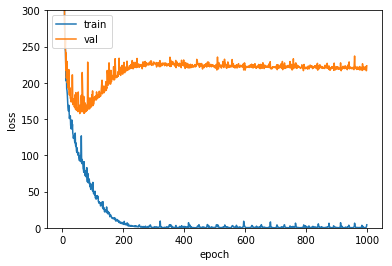

100/100 [==============================] - 0s 326us/step
264.794628200531


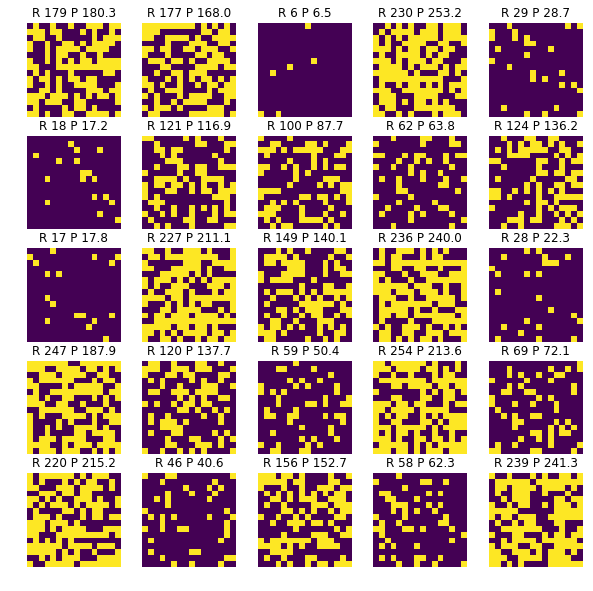

In [1]:
# 컨볼루션 신경망 모델

# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

width = 16
height = 16

def generate_dataset(samples):

    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
    
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)
    
def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    
    return img.reshape(width, height, 1)

# 1. 데이터셋 생성하기
x_train, y_train = generate_dataset(1500)
x_val, y_val = generate_dataset(300)
x_test, y_test = generate_dataset(100)

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mse', optimizer='adam')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, batch_size=32, epochs=1000, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)

print(score)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()

### 5. 학습결과 비교
다층퍼셉트론 신경망 모델과 컨볼루션 신경망 모델을 비교했을 때<br>
현재 파라미터로는 다층퍼셉트론 신경망 모델의 정확도가 더 높았다.<br>
라벨값이 모양 및 색상 등 이미지의 특성보다 단순히 1인 픽셀 개수와 관련이 있기 때문에 컨볼루션 신경망 모델이 크게 성능을 발휘 못했다.<br>
<br>
즉 영상 입력이라고 해서 컨볼루션 신경망 모델이 항상 좋은 성능이 나오는 것이 아니다.<br>
어떤 모델이 성능이 좋게 나올지는 테스트를 해봐야겠지만, 워낙 모델을 다양하게 구성할 수 있고 여러 파라미터를 설정할 수 있으므로 모델을 개발하기 전에 데이터 특징을 분석하고 적절한 후보 모델들을 선정하는 것을 권장한다.